 # Convolution Neural Networks
Understanding CNN's Better

Let us a build a small Convnet to classify MNIST Dataset

In [1]:
from keras.layers import *
from keras.models import Sequential

2023-01-03 08:22:30.740825: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Build a Model

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

# --- Continued in Google Colab

In [4]:
# Dataset 
from keras.datasets import mnist
from keras.utils import to_categorical
(XTrain,YTrain),(XTest,YTest) = mnist.load_data()


11490434/11490434 [==============================] - 3s 0us/step


In [5]:
def preprocess_data(X,Y):
  X = X.reshape((-1,28,28,1))
  X = X/255.0
  Y = to_categorical(Y)
  return X,Y
XTrain, YTrain = preprocess_data(XTrain,YTrain)
XTest, YTest = preprocess_data(XTest,YTest)
print(XTrain.shape,YTrain.shape)

(60000, 28, 28, 1) (60000, 10)


# Don't run the below tab it will take a lot of time , try this on Google Colab 

In [6]:

# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# hist = model.fit(XTrain,YTrain,epochs = 20, validation_split=0.1,batch_size=128)

In [7]:
# model.evaluate(XTest,YTest)

# Data Augmentation
- Deep Learning Models are "Data Hungry"
- Small Datasets lead to overfitting most of the times
- So lets generate more data by augmenting the training samples 

In [21]:
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt

In [22]:
img = image.load_img("jerry.jpeg",target_size=(100,100))

x = image.img_to_array(img)/255.0

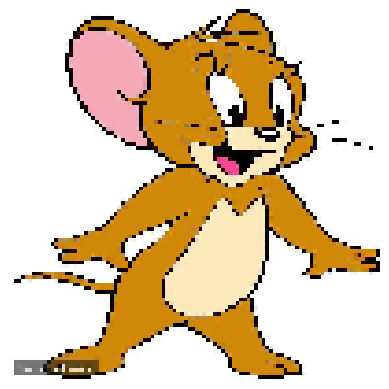

In [23]:
plt.axis("off")
plt.imshow(x)

In [24]:
x = x.reshape((1,100,100,3))

In [25]:
datagen = image.ImageDataGenerator(
        rotation_range = 30,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = "nearest"

)

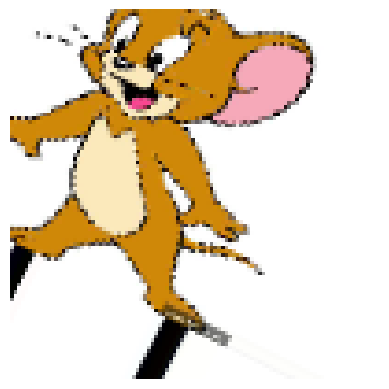

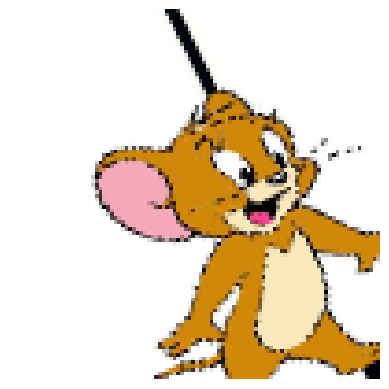

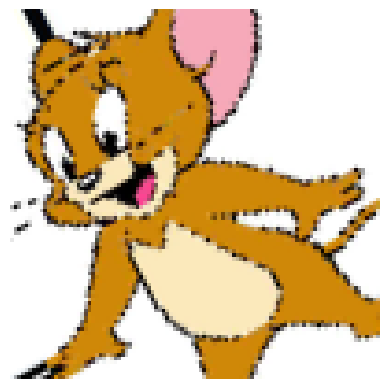

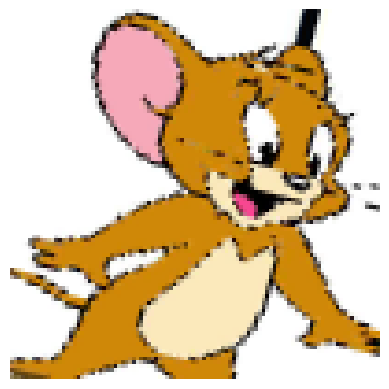

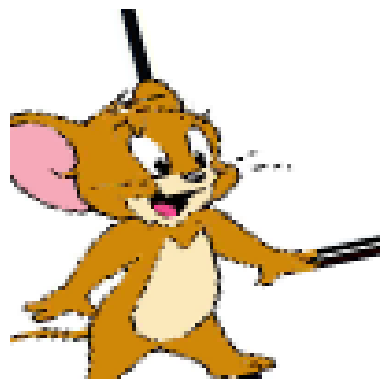

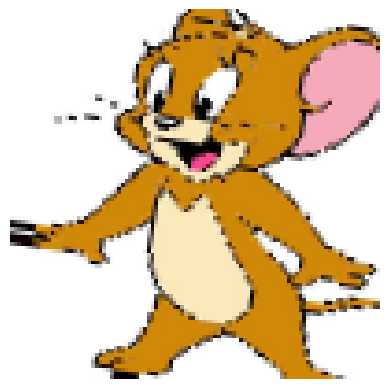

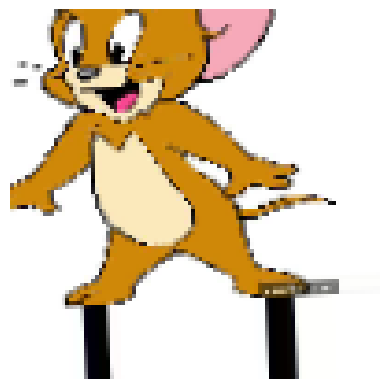

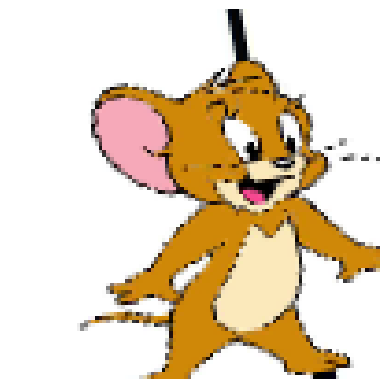

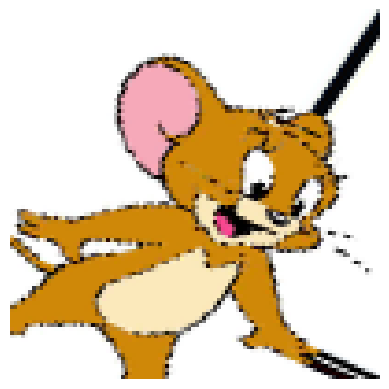

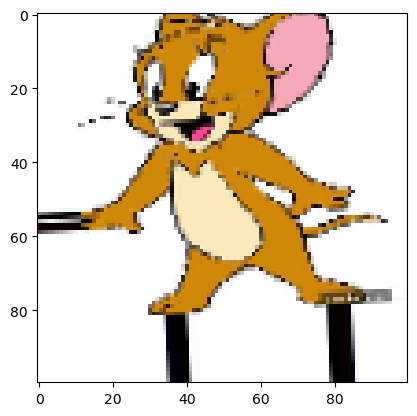

In [27]:
i =0 
for batch in datagen.flow(x,batch_size=1):
    
    plt.figure()
    imgplot = plt.imshow(image.img_to_array(batch[0]))
    i+=1
    if i==10:
        break
    plt.axis("off")
    plt.show()